This project implements linear regression using gradient descent.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt

#Data preprocessing

##Data loading

In [3]:
# use pandas to load GOOGL.csv into data frame
# use default parameter values
df = pd.read_csv('./GOOGL.csv')
df

,open,high,low,close,volume
0,1149.42,1149.91,1114.43,1116.28,822394
1,1115.35,1142.99,1106.60,1142.11,1161040
2,1132.31,1141.36,1127.02,1129.19,1578116
3,1112.39,1134.00,1106.07,1126.78,1486675
4,1136.00,1146.21,1116.70,1116.94,1726866
...,...,...,...,...,...
95,1083.45,1094.10,1067.23,1091.36,1806206
96,1054.32,1075.47,1049.80,1072.70,2029979
97,1050.00,1061.22,1046.92,1054.14,1574121
98,1056.67,1065.57,1045.49,1054.56,2796258


## Data Visualization

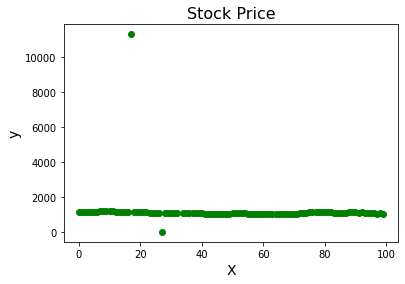

In [4]:
# Visualize the plot of x (row index), y (close value)

import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.scatter(df.index, df.close, color='g')

plt.title('Stock Price', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

## Remove outliers

In [5]:
# Remove the outliers that you see from the plot
# Complete the if condition
row_index = []
for index, row in df.iterrows():
  # if df.close[index]<1000 or df.close[index]>2000 or pd.isnull(df.close[index]):
  if row['close'] > 2000 or row['close'] < 1000 or np.isnan(row['close']):
    row_index.append(index)
df = df.drop(df.index[row_index])

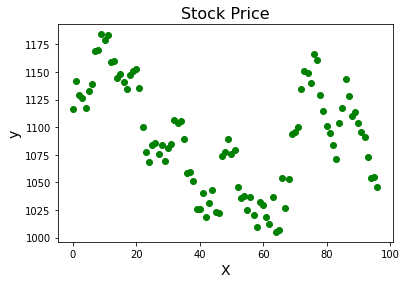

In [6]:
# Visualize the plot again
# Use the code from above

fig, ax = plt.subplots()
ax.scatter(range(len(df['close'])), df['close'], color='g')
plt.title('Stock Price', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

## Scale

In [7]:
# Normalization
def minmax_scaler(arr):
  return (arr-min(arr))/(max(arr)-min(arr))

# Standardization
def gaussian_scaler(arr):
  mean = np.sum(arr)/len(arr)
  standard_deviation = np.sqrt(np.sum((arr-mean)**2)/len(arr))
  return (arr-mean)/standard_deviation


## Train Validation Split

In [8]:
# Split the data into training set and validation set
# For the purpose of this project
#   We want to train on the first 80 data points
#   and validate on the rest of the data points
train = df[:80]
validation = df[80:]

X_train = np.array(train.index).reshape(-1, 1)
y_train = train['close']
X_val = np.array(validation.index).reshape(-1, 1)
y_val = validation['close']

In [30]:
# Apply two scalers
X_train = X_train / 100
y_train = minmax_scaler(y_train)
y_train = gaussian_scaler(y_train)

X_val = X_val / 100
y_val = minmax_scaler(y_val)
y_val = gaussian_scaler(y_val)


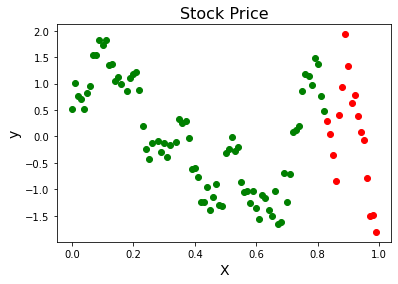

In [31]:
# Visualize the plot again
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='g')
ax.scatter(X_val, y_val, color='r')
plt.title('Stock Price', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

# Model architecture

In [32]:
# This class is the implementation of linear regression using GD
class YourLinearRegression:
    def __init__(self, w=0, b=0, epochs=100, learning_rate=0.01):
      # initialize model parameters, hyparameters and other variables
      self.coef_ = w
      self.intercept_ = b
      self.epochs = epochs
      self.learning_rate = learning_rate
      self.train_costs = []
      self.val_costs = []

    # This function computes the batch gradient descent
    # returns the cost of the batch
    def batch_gradient_descent(self, X, y):
      w, b = self.coef_, self.intercept_
      N = float(len(y))
      # Compute the output        
      y_pred = (w * X) + b

      # Compute the gradient
      w_gradient = (-2/N) * np.sum(X  * (y - y_pred))
      b_gradient = (-2/N) * np.sum(y - y_pred)

      # Tune the model parameters
      w = w - (self.learning_rate * w_gradient)
      b = b - (self.learning_rate * b_gradient)
      
      # Update the model parameters
      self.coef_, self.intercept_ = w, b

      # Compute the current cost, so we can visualize the progress
      cost = np.mean([loss**2 for loss in (y - y_pred)])
      return cost 

    def mini_batch_gradient_descent(self, X, y, size):
      w, b = self.coef_, self.intercept_
      N = float(len(y))
      cost_lst = []
      
      # Divide data into mini-batch
      X_split = np.array_split(X,size)
      y_split = np.array_split(y,size)

      for x_i, y_i in zip(X_split, y_split):
        # Compute the gradient
        y_pred = (w * x_i) + b
        w_gradient = (-2/N) * np.sum((x_i * (y_i - y_pred)))
        b_gradient = (-2/N) * np.sum((y_i - y_pred))

        # Tune the model parameters
        w = w - (self.learning_rate * w_gradient)
        b = b - (self.learning_rate * b_gradient)

        # Compute the current cost, so we can visualize the progress
        cost = np.mean([loss**2 for loss in (y_i - y_pred)])
        cost_lst.append(cost)
      
      # Update the model parameters
      self.coef_, self.intercept_ = w, b

      return np.mean(cost_lst)
    
    # This function computes the stochastic gradient descent
    # returns the average cost of the training data
    def stochastic_gradient_descent(self, X, y):
      w, b = self.coef_, self.intercept_
      N = float(len(y))
      cost_lst = []
      for x_i, y_i in zip(X, y):
        # Compute the gradient
        y_pred = (w * x_i) + b
        w_gradient = (-2/N) * (x_i * (y_i - y_pred))
        b_gradient = (-2/N) * (y_i - y_pred)

        # Tune the model parameters
        w = w - (self.learning_rate * w_gradient)
        b = b - (self.learning_rate * b_gradient)

        # Compute the current cost, so we can visualize the progress
        cost = (y_i - y_pred)**2
        cost_lst.append(cost)

      # Update the model parameters
      self.coef_, self.intercept_ = w, b

      return np.mean(cost_lst)
    
    def fit(self, X, y, X_val, y_val):
      X, y  = np.array(X).reshape(-1), np.array(y)
      X_val, y_val = np.array(X_val).reshape(-1), np.array(y_val)

      # We do batch training in this example
      for i in range(self.epochs):
        # Gradient descent
        cost = self.stochastic_gradient_descent(X, y)
        self.train_costs.append([i, cost])

        # We evaluate the validation set every few epochs
        if i % 10 == 0:
          w, b = self.coef_, self.intercept_
          y_val_pred = (w * X_val) + b

          val_cost = np.mean([loss**2 for loss in (y_val - y_val_pred)])
          self.val_costs.append([i, val_cost])

          print('Epoch', i, ': train cost is', cost, ', validation cost is', val_cost)
      
    def predict(self, x):
      # linear regression prediction
      return self.coef_ * x + self.intercept_

In [33]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
your_model = YourLinearRegression()

# Model training

## Train sklearn model

In [34]:
# Train the sklearn linear regression, and print slope/intercept
sklearn_model.fit(X_train, y_train)
print('Slope: ', sklearn_model.coef_)
print('Intercept: ', sklearn_model.intercept_)

Slope:  [-1.93069183]
Intercept:  0.8026851275892546


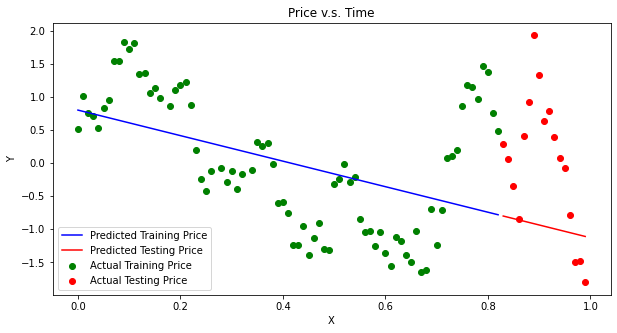

In [35]:
# Inference time
# Use trained sklearn model to predict training data and validation data
y_pred = sklearn_model.predict(X_train)
y_val_pred = sklearn_model.predict(X_val)

plt.figure(1, figsize=(10,5))
plt.title('Price v.s. Time')

plt.scatter(X_train, y_train, color='g', label='Actual Training Price')
plt.scatter(X_val, y_val, color='r', label='Actual Testing Price')

plt.plot(X_train, y_pred, color='b', label='Predicted Training Price')
plt.plot(X_val, y_val_pred, color='r', label='Predicted Testing Price')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Train your model

In [36]:
# Train the your own linear regression, and print slope/intercept
your_model.fit(X_train, y_train, X_val, y_val)
print('Slope: ', your_model.coef_)
print('Intercept: ', your_model.intercept_)

Epoch 0 : train cost is 1.0000364339908376 , validation cost is 0.999891775096272
Epoch 10 : train cost is 0.9951553407005476 , validation cost is 0.9992558262621472
Epoch 20 : train cost is 0.9906145163044862 , validation cost is 0.9992393895601763
Epoch 30 : train cost is 0.9863135558372026 , validation cost is 0.9996459029373344
Epoch 40 : train cost is 0.9821896726533412 , validation cost is 1.0003494498894698
Epoch 50 : train cost is 0.9782034559453991 , validation cost is 1.0012697234491057
Epoch 60 : train cost is 0.9743300117860345 , validation cost is 1.0023558426528911
Epoch 70 : train cost is 0.970553455506975 , validation cost is 1.0035758637599228
Epoch 80 : train cost is 0.9668634897260148 , validation cost is 1.004909968693102
Epoch 90 : train cost is 0.963253279861134 , validation cost is 1.0063460368667734
Slope:  -0.1942418674867781
Intercept:  0.045241561727766125


In [37]:
# Use trained your own model to predict training data and validation data
y_pred = your_model.predict(X_train)
y_val_pred = your_model.predict(X_val)


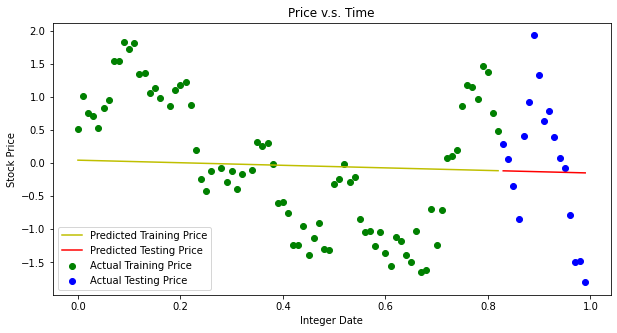

In [38]:
plt.figure(1, figsize=(10,5))
plt.title('Price v.s. Time')
plt.scatter(X_train, y_train, color='g', label='Actual Training Price')
plt.scatter(X_val, y_val, color='b', label='Actual Testing Price')
plt.plot(X_train, y_pred, color='y', label='Predicted Training Price')
plt.plot(X_val, y_val_pred, color='r', label='Predicted Testing Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#Model Evaluation

##Train and Validation cost

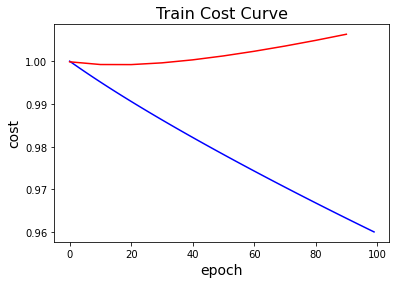

In [39]:
plt.plot(np.array(your_model.train_costs)[:,0], np.array(your_model.train_costs)[:,1], color='b')
plt.plot(np.array(your_model.val_costs)[:,0], np.array(your_model.val_costs)[:,1], color='r')
plt.title('Train Cost Curve', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('cost', fontsize=14)

plt.show()

#Interview questions



1.  What would happen if we do not scale the data?

2.  What is the difference between batch gradient descent and stochastic gradient descent?   

3.  What would happen if we use very large learning rate (1) or very small learning rate (0.0000001)? 

4. Why is the validation loss much higher than the training loss?

5. How to avoid overfitting?

